# # RDD operations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
print(os.environ['SPARK_HOME'])
#print(os.environ['JAVA_HOME'])

/opt/spark


In [4]:
import findspark

In [5]:
findspark.find()

'/home/shashank/env/lib/python3.8/site-packages/pyspark'

In [7]:
from pyspark import SparkContext, SparkConf

In [8]:
from pyspark.sql import SparkSession

In [9]:
conf = SparkConf().setAppName("newApp").setMaster("local[4]")

In [9]:
sc = SparkContext(conf=conf).getOrCreate()

22/04/18 15:00:12 WARN Utils: Your hostname, shashank resolves to a loopback address: 127.0.1.1; using 192.168.0.108 instead (on interface wlp3s0)
22/04/18 15:00:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/18 15:00:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [38]:
sc.stop()

In [26]:
spark.stop()

In [12]:
sc.getConf().getAll()

[('spark.driver.port', '43395'),
 ('spark.app.id', 'local-1649314599493'),
 ('spark.app.name', 'newApp'),
 ('spark.master', 'local[4]'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.host', '192.168.0.108'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.startTime', '1649314596083'),
 ('spark.ui.showConsoleProgress', 'true')]

In [12]:
data = sc.textFile('data.csv',use_unicode=True)
data.take(2)

[',ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause',
 '0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",,2021,5\'7,159lbs,88

In [20]:
def split_line(x):
    return x.split(',')

def clubGroup(x):
    return x[9]


#data.map(split_line).take(1)

In [21]:
#counting number of clubs

splitRDD = data.map(split_line)
groupByClub = splitRDD.map(lambda x:x[9])
addOne = groupByClub.map(lambda x:(x,1))
AggClub = addOne.reduceByKey(lambda x,y:x+y)
ClubSorted = AggClub.sortBy(lambda x:x[1])
ClubSorted.take(50)

[('Club', 1),
 ('Derry City', 18),
 ('Sligo Rovers', 19),
 ('Limerick FC', 19),
 ('Santos', 20),
 ('Paraná', 20),
 ('Atlético Paranaense', 20),
 ('Sport Club do Recife', 20),
 ('Chapecoense', 20),
 ('Tromsø IL', 20),
 ('Grêmio', 20),
 ('Atlético Mineiro', 20),
 ('Cruzeiro', 20),
 ('Fluminense', 20),
 ('Internacional', 20),
 ('América FC (Minas Gerais)', 20),
 ('Botafogo', 20),
 ('Bahia', 20),
 ('Vitória', 20),
 ('Ceará Sporting Club', 20),
 ('Melbourne Victory', 21),
 ('Wellington Phoenix', 21),
 ('Dalkurd FF', 21),
 ('Östersunds FK', 22),
 ('FK Haugesund', 22),
 ('Shamrock Rovers', 22),
 ('Chicago Fire', 23),
 ('FC København', 23),
 ('Clube Sport Marítimo', 23),
 ('Brisbane Roar', 23),
 ('AC Ajaccio', 23),
 ('Colorado Rapids', 23),
 ('Dundalk', 23),
 ('IFK Göteborg', 23),
 ("St. Patrick's Athletic", 23),
 ('Bray Wanderers', 23),
 ('Kasimpaşa SK', 23),
 ('GFC Ajaccio', 23),
 ('GIF Sundsvall', 23),
 ('Odds BK', 23),
 ('Cagliari', 24),
 ('IFK Norrköping', 24),
 ('Strømsgodset IF', 24),
 

In [22]:
data.getNumPartitions()

2

In [23]:
emptyRDD = sc.emptyRDD()
emptyRDD.glom().collect()

[]

In [24]:
data

data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [25]:
sc.getConf().getAll()

[('spark.app.name', 'newApp'),
 ('spark.master', 'local[4]'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.host', '192.168.0.108'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1649221070974'),
 ('spark.app.startTime', '1649221067356'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.port', '44031')]

## RDD functions

In [26]:
num = sc.parallelize(range(1,10),1)

In [27]:
num.takeOrdered(5, lambda x:-x)

[9, 8, 7, 6, 5]

In [28]:
#repartition and coalesce
numRepartitioned = num.repartition(7)
print(numRepartitioned.glom().collect())
numCoalesce = numRepartitioned.coalesce(3)
print(numCoalesce.getNumPartitions())
numCoalesce.glom().collect()

[[], [], [], [], [], [], [1, 2, 3, 4, 5, 6, 7, 8, 9]]
3


[[1, 2, 3, 4, 5, 6, 7, 8, 9], [], []]

In [31]:
numCoalesce.toDebugString()

b'(3) CoalescedRDD[30] at coalesce at NativeMethodAccessorImpl.java:0 []\n |  MapPartitionsRDD[28] at coalesce at NativeMethodAccessorImpl.java:0 []\n |  CoalescedRDD[27] at coalesce at NativeMethodAccessorImpl.java:0 []\n |  ShuffledRDD[26] at coalesce at NativeMethodAccessorImpl.java:0 []\n +-(1) MapPartitionsRDD[25] at coalesce at NativeMethodAccessorImpl.java:0 []\n    |  PythonRDD[24] at RDD at PythonRDD.scala:53 []\n    |  ParallelCollectionRDD[21] at readRDDFromFile at PythonRDD.scala:274 []'

In [32]:
num.getNumPartitions()

1

In [33]:
num.reduce(lambda x,y:x+y)

45

In [34]:
num.reduce(lambda x,y:x*y)

362880

In [35]:
num.countByValue()

defaultdict(int, {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

In [36]:
num.take(3)

[1, 2, 3]

In [30]:
num.fold(3,lambda x,y:x+y)

51

In [31]:
num.fold(2,lambda x,y:x*y)

1451520

In [37]:
s = sc.parallelize([1,2,3,4,5,6,7,8,9,0])
print(s.sample(False,0.8,123).collect())
print(s.sample(False,0.8,131).collect())

[2, 3, 4, 5, 7, 9, 0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]


In [38]:
num.getNumPartitions()

1

In [41]:
num1 = sc.parallelize([12,28,6,4,45,69,35,75,42])
num1.getNumPartitions()

4

In [42]:
num1.glom().collect()

[[12, 28], [6, 4], [45, 69], [35, 75, 42]]

In [43]:
num.subtract(num1).collect()

[5, 1, 2, 7, 3, 8, 9]

In [44]:
num.union(num1).collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 28, 6, 4, 45, 69, 35, 75, 42]

In [45]:
num.intersection(num1).collect()

[6, 4]

In [46]:
num.distinct().collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [47]:
names = sc.parallelize(["abahs","jsgdj","andios","jdaopj","baofje"])

names_grp = names.groupBy(lambda x: x[-1]).collect()

In [48]:
names_grp

[('s', <pyspark.resultiterable.ResultIterable at 0x7f9905381760>),
 ('e', <pyspark.resultiterable.ResultIterable at 0x7f990530cbe0>),
 ('j', <pyspark.resultiterable.ResultIterable at 0x7f990530cc40>)]

In [49]:
for k,v in names_grp:
    print(k,list(v))

s ['abahs', 'andios']
e ['baofje']
j ['jsgdj', 'jdaopj']


In [50]:
num.filter(lambda x : x%2==0).collect()

[2, 4, 6, 8]

In [51]:
num.map(lambda x : x*2).collect()

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [52]:
num.reduce(min)

1

In [53]:
num1.distinct().collect()

[12, 28, 4, 45, 69, 6, 42, 35, 75]

KEY VALUE PAIR TRANSFORMATION

In [45]:
kv = sc.parallelize([(1,2),(2,3),(1,5),(3,6),(2,7)])
kv.groupByKey().mapValues(sum).collect()

[(1, 7), (2, 10), (3, 6)]

In [46]:
kv.reduceByKey(min).collect()

[(1, 2), (2, 3), (3, 6)]

## saving RDD

In [56]:
data.saveAsTextFile("SavedRDD")

In [57]:
def toCSV(data):
    return ','.join(str(d) for d in data)

csvFile = data.map(toCSV)
csvFile.saveAsTextFile("dataCSV.csv")

22/04/06 11:32:15 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1473956 ms exceeds timeout 120000 ms
22/04/06 11:32:15 WARN SparkContext: Killing executors is not supported by current scheduler.


# DataFrames

In [10]:
spark = SparkSession.builder\
.master('local[2]')\
.appName("App")\
.getOrCreate()

22/04/26 12:58:53 WARN Utils: Your hostname, shashank resolves to a loopback address: 127.0.1.1; using 192.168.0.108 instead (on interface wlp3s0)
22/04/26 12:58:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/26 12:58:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [75]:
spark2 = SparkSession.builder.master('local[4]').appName("App2").getOrCreate()

In [11]:
columns = ["language","users_count"]
data = [("Java", 20000), ("Python", 100000), ("Scala", 3000)]

In [12]:
#converting rdd to dataframe
rdd = spark.sparkContext.parallelize(data)
dfFromRdd = rdd.toDF(columns)

In [13]:
dfFromRdd.show()

+--------+-----------+
|language|users_count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



In [55]:
df.describe().show()

+-------+------------------+-------------+------------------+-----------+-----------------+--------------------+-----+-----------+
|summary|                ID|         Name|               Age|Nationality|          Overall|                Club|Value|     Joined|
+-------+------------------+-------------+------------------+-----------+-----------------+--------------------+-----+-----------+
|  count|             18207|        18207|             18207|      18207|            18207|               17966|18207|      16654|
|   mean|214298.33860603065|         null|25.122205745043114|       null|66.23869940132916|                null| null|       null|
| stddev| 29965.24420376609|         null| 4.669942713414311|       null| 6.90892961188289|                null| null|       null|
|    min|                16|     A. Abang|                16|Afghanistan|               46| SSV Jahn Regensburg|   €0|Apr 1, 2008|
|    max|            246620|Óscar Whalley|                45|   Zimbabwe|          

In [14]:
from pyspark.sql.types import StructField,StructType,StringType,IntegerType,DateType
from pyspark.sql.functions import lit,col,isnan,regexp_replace,avg,sum,when
import pyspark.sql.functions as f

In [15]:
#specifying schema for dataframes
schema = StructType([StructField("language",StringType()),StructField("users_count",IntegerType())])

In [16]:
dfSchema = spark.createDataFrame(data=data,schema=schema)

In [17]:
dfSchema.show()

+--------+-----------+
|language|users_count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



In [18]:
df = dfSchema.withColumn("Country",lit("India")).withColumn("State",lit("Goa"))
df.show()

+--------+-----------+-------+-----+
|language|users_count|Country|State|
+--------+-----------+-------+-----+
|    Java|      20000|  India|  Goa|
|  Python|     100000|  India|  Goa|
|   Scala|       3000|  India|  Goa|
+--------+-----------+-------+-----+



In [18]:
df = dfSchema.withColumn("Popularity",when(col("users_count")>20000,"Most Populer")\
                         .when(col("users_count")>5000,"Intermediate")\
                         .otherwise("Less Populer"))

df.show()

+--------+-----------+------------+
|language|users_count|  Popularity|
+--------+-----------+------------+
|    Java|      20000|Intermediate|
|  Python|     100000|Most Populer|
|   Scala|       3000|Less Populer|
+--------+-----------+------------+



In [25]:
# ERROR 
# spark.conf.set("spark.executor.memory","4g")
# spark.conf.set("spark.executor.cores","2")

AnalysisException: Cannot modify the value of a Spark config: spark.executor.memory

In [32]:
# spark.conf.get("spark.executor.cores")  #ERROR

Py4JJavaError: An error occurred while calling o140.get.
: java.util.NoSuchElementException: spark.executor.cores
	at org.apache.spark.sql.errors.QueryExecutionErrors$.noSuchElementExceptionError(QueryExecutionErrors.scala:1494)
	at org.apache.spark.sql.internal.SQLConf.$anonfun$getConfString$3(SQLConf.scala:4128)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.internal.SQLConf.getConfString(SQLConf.scala:4128)
	at org.apache.spark.sql.RuntimeConfig.get(RuntimeConfig.scala:72)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [19]:
# spark.stop()

## Football datasets

In [19]:
import pyspark
dir(pyspark.sql)

['Catalog',
 'Column',
 'DataFrame',
 'DataFrameNaFunctions',
 'DataFrameReader',
 'DataFrameStatFunctions',
 'DataFrameWriter',
 'GroupedData',
 'HiveContext',
 'PandasCogroupedOps',
 'Row',
 'SQLContext',
 'SparkSession',
 'UDFRegistration',
 'Window',
 'WindowSpec',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'catalog',
 'column',
 'conf',
 'context',
 'dataframe',
 'functions',
 'group',
 'pandas',
 'readwriter',
 'session',
 'streaming',
 'types',
 'udf',
 'utils',
 'window']

In [20]:
col = ['ID','Name','Age','Nationality','Overall','Club','Value','Joined']
df = spark.read.csv('data.csv',header=True,inferSchema=True).select(col)
df.head()

Row(ID=158023, Name='L. Messi', Age=31, Nationality='Argentina', Overall=94, Club='FC Barcelona', Value='€110.5M', Joined='Jul 1, 2004')

In [21]:
df.rdd.getNumPartitions()

2

In [23]:
df.persist()

DataFrame[ID: int, Name: string, Age: int, Nationality: string, Overall: int, Club: string, Value: string, Joined: string]

In [24]:
df.count()

18207

In [15]:
# loading json file
iris = spark.read.json('iris.json',multiLine=True)

iris.printSchema()
iris.count()

# using url https://api.github.com/users/mralexgray/repos
import requests
import json

json_request = requests.request('GET',"https://api.github.com/users/hadley/orgs")
json_data = json_request.json()

f = open('/home/shashank/Practice/url_data.json','w')

for record in json_data:
    f.write(str(record))
    f.write("\n")
    
f.close()

data = spark.read.json('/home/shashank/Practice/url_data.json')
data.printSchema()
data.select("ID").show()

root
 |-- petalLength: double (nullable = true)
 |-- petalWidth: double (nullable = true)
 |-- sepalLength: double (nullable = true)
 |-- sepalWidth: double (nullable = true)
 |-- species: string (nullable = true)

root
 |-- _corrupt_record: string (nullable = true)
 |-- avatar_url: string (nullable = true)
 |-- description: string (nullable = true)
 |-- events_url: string (nullable = true)
 |-- hooks_url: string (nullable = true)
 |-- id: long (nullable = true)
 |-- issues_url: string (nullable = true)
 |-- login: string (nullable = true)
 |-- members_url: string (nullable = true)
 |-- node_id: string (nullable = true)
 |-- public_members_url: string (nullable = true)
 |-- repos_url: string (nullable = true)
 |-- url: string (nullable = true)

+--------+
|      ID|
+--------+
|  423638|
|  513560|
|    null|
| 1200269|
|    null|
| 5695665|
|15366137|
|22032646|
|22618716|
|34165516|
+--------+



In [25]:
df.rdd.getNumPartitions()

3

In [26]:
df = df.repartition(1)
df.rdd.getNumPartitions()

1

In [27]:
df.distinct().count()

18207

In [22]:
df.show(truncate=False)

+------+-----------------+---+-----------+-------+-------------------+-------+------------+
|ID    |Name             |Age|Nationality|Overall|Club               |Value  |Joined      |
+------+-----------------+---+-----------+-------+-------------------+-------+------------+
|158023|L. Messi         |31 |Argentina  |94     |FC Barcelona       |€110.5M|Jul 1, 2004 |
|20801 |Cristiano Ronaldo|33 |Portugal   |94     |Juventus           |€77M   |Jul 10, 2018|
|190871|Neymar Jr        |26 |Brazil     |92     |Paris Saint-Germain|€118.5M|Aug 3, 2017 |
|193080|De Gea           |27 |Spain      |91     |Manchester United  |€72M   |Jul 1, 2011 |
|192985|K. De Bruyne     |27 |Belgium    |91     |Manchester City    |€102M  |Aug 30, 2015|
|183277|E. Hazard        |27 |Belgium    |91     |Chelsea            |€93M   |Jul 1, 2012 |
|177003|L. Modrić        |32 |Croatia    |91     |Real Madrid        |€67M   |Aug 1, 2012 |
|176580|L. Suárez        |31 |Uruguay    |91     |FC Barcelona       |€80M   |Ju

In [23]:
#changing the datatypes of "value" column
df.dtypes
df = df.withColumn('Value', regexp_replace('Value','[€,.]',''))
df = df.withColumn('Value', regexp_replace('Value','[M]','0000000'))
df = df.withColumn('Value', regexp_replace('Value','[K]','000'))
df = df.withColumn('Value',df.Value.cast('long'))
df.show(5)

+------+-----------------+---+-----------+-------+-------------------+-----------+------------+
|    ID|             Name|Age|Nationality|Overall|               Club|      Value|      Joined|
+------+-----------------+---+-----------+-------+-------------------+-----------+------------+
|158023|         L. Messi| 31|  Argentina|     94|       FC Barcelona|11050000000| Jul 1, 2004|
| 20801|Cristiano Ronaldo| 33|   Portugal|     94|           Juventus|  770000000|Jul 10, 2018|
|190871|        Neymar Jr| 26|     Brazil|     92|Paris Saint-Germain|11850000000| Aug 3, 2017|
|193080|           De Gea| 27|      Spain|     91|  Manchester United|  720000000| Jul 1, 2011|
|192985|     K. De Bruyne| 27|    Belgium|     91|    Manchester City| 1020000000|Aug 30, 2015|
+------+-----------------+---+-----------+-------+-------------------+-----------+------------+
only showing top 5 rows



In [24]:
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")

In [25]:
df = df.withColumn("Joined",f.to_date(df.Joined,"MMM dd,yyyy"))  

In [26]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Value: long (nullable = true)
 |-- Joined: date (nullable = true)



In [27]:
df.show()

+------+-----------------+---+-----------+-------+-------------------+-----------+----------+
|    ID|             Name|Age|Nationality|Overall|               Club|      Value|    Joined|
+------+-----------------+---+-----------+-------+-------------------+-----------+----------+
|158023|         L. Messi| 31|  Argentina|     94|       FC Barcelona|11050000000|2004-07-01|
| 20801|Cristiano Ronaldo| 33|   Portugal|     94|           Juventus|  770000000|2018-07-10|
|190871|        Neymar Jr| 26|     Brazil|     92|Paris Saint-Germain|11850000000|2017-08-03|
|193080|           De Gea| 27|      Spain|     91|  Manchester United|  720000000|2011-07-01|
|192985|     K. De Bruyne| 27|    Belgium|     91|    Manchester City| 1020000000|2015-08-30|
|183277|        E. Hazard| 27|    Belgium|     91|            Chelsea|  930000000|2012-07-01|
|177003|        L. Modrić| 32|    Croatia|     91|        Real Madrid|  670000000|2012-08-01|
|176580|        L. Suárez| 31|    Uruguay|     91|       FC 

In [28]:
#checking number of null values

from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col('Club').isNull(),True)),count(when(col('Joined').isNull(),True))]).show()

+---------------------------------------------+-----------------------------------------------+
|count(CASE WHEN (Club IS NULL) THEN true END)|count(CASE WHEN (Joined IS NULL) THEN true END)|
+---------------------------------------------+-----------------------------------------------+
|                                          241|                                           1553|
+---------------------------------------------+-----------------------------------------------+



In [20]:
df.select(count(when(col('Club').isNull(),True))).show()

+---------------------------------------------+
|count(CASE WHEN (Club IS NULL) THEN true END)|
+---------------------------------------------+
|                                          241|
+---------------------------------------------+



In [35]:
df.filter(col('Club').isNull()).show(5)

+------+------------+---+-----------+-------+----+-----+------+
|    ID|        Name|Age|Nationality|Overall|Club|Value|Joined|
+------+------------+---+-----------+-------+----+-----+------+
|207439|  L. Paredes| 24|  Argentina|     80|null|    0|  null|
|156713|A. Granqvist| 33|     Sweden|     80|null|    0|  null|
|229909|    A. Lunev| 26|     Russia|     79|null|    0|  null|
|187347|I. Smolnikov| 29|     Russia|     79|null|    0|  null|
|187607|   A. Dzyuba| 29|     Russia|     78|null|    0|  null|
+------+------------+---+-----------+-------+----+-----+------+
only showing top 5 rows



In [36]:
df.count()

18207

In [104]:
18207-17966

241

In [29]:
#dropping rows with na value
df = df.na.drop(how='any',subset=['Club','Joined'])

In [53]:
df_fill = df.na.fill("Fc_Goa",subset=['Club'])  #filling the na values
df_fill.filter(df_fill.Club=="Fc_Goa").show()

+---+----+---+-----------+-------+----+-----+------+
| ID|Name|Age|Nationality|Overall|Club|Value|Joined|
+---+----+---+-----------+-------+----+-----+------+
+---+----+---+-----------+-------+----+-----+------+



In [49]:
df.count()

16654

In [51]:
df.filter(df.Club == 'FC Barcelona').show(5)

+------+---------------+---+-----------+-------+------------+-----------+----------+
|    ID|           Name|Age|Nationality|Overall|        Club|      Value|    Joined|
+------+---------------+---+-----------+-------+------------+-----------+----------+
|158023|       L. Messi| 31|  Argentina|     94|FC Barcelona|11050000000|2004-07-01|
|176580|      L. Suárez| 31|    Uruguay|     91|FC Barcelona|  800000000|2014-07-11|
|192448|  M. ter Stegen| 26|    Germany|     89|FC Barcelona|  580000000|2014-07-01|
|189511|Sergio Busquets| 29|      Spain|     89|FC Barcelona| 5150000000|2008-09-01|
|189242|       Coutinho| 26|     Brazil|     88|FC Barcelona| 6950000000|2018-01-06|
+------+---------------+---+-----------+-------+------------+-----------+----------+
only showing top 5 rows



In [25]:
df.select('ID',when(col('Age')<25,'less').otherwise('more').alias('Condition'),'Club','Age').orderBy('ID').show(5)

+---+---------+--------------------+---+
| ID|Condition|                Club|Age|
+---+---------+--------------------+---+
| 16|     more|           KAS Eupen| 37|
| 41|     more|         Vissel Kobe| 34|
| 80|     more|Medipol Başakşehi...| 37|
|164|     more|              Padova| 37|
|657|     more|        Notts County| 35|
+---+---------+--------------------+---+
only showing top 5 rows



In [98]:
# df.select("Preferred foot").replace('Left','L').replace('Right','R').show(4)

+--------------+
|Preferred foot|
+--------------+
|             R|
|             R|
|             R|
|             R|
+--------------+
only showing top 4 rows



In [52]:
df.na.drop().count()
#df.show(5)

16654

In [53]:
df.select('Value').na.drop().count()

16654

In [40]:
df.groupBy("Club").avg().show()

+-------------------+------------------+------------------+-----------------+--------------------+
|               Club|           avg(ID)|          avg(Age)|     avg(Overall)|          avg(Value)|
+-------------------+------------------+------------------+-----------------+--------------------+
|       FC Barcelona|210877.15151515152|23.848484848484848|78.03030303030303|1.4597818181818182E9|
|           Juventus|         187675.68|             27.16|            82.28|          1.289223E9|
|Paris Saint-Germain|202491.83333333334|24.566666666666666|77.43333333333334|1.1224441666666667E9|
|  Manchester United|202182.48484848486|24.757575757575758|77.24242424242425| 9.785530303030303E8|
|    Manchester City|206869.36363636365| 23.90909090909091|76.72727272727273|1.2567531818181818E9|
|            Chelsea|      199623.84375|             25.25|         76.59375|      7.5693796875E8|
|        Real Madrid|          213881.0| 24.03030303030303|78.24242424242425|          1.409225E9|
|    Atlét

In [60]:
df.filter("Nationality == 'Argentina' and Club=='FC Barcelona'").show()

+------+--------+---+-----------+-------+------------+-----------+-----------+
|    ID|    Name|Age|Nationality|Overall|        Club|      Value|     Joined|
+------+--------+---+-----------+-------+------------+-----------+-----------+
|158023|L. Messi| 31|  Argentina|     94|FC Barcelona|11050000000|Jul 1, 2004|
+------+--------+---+-----------+-------+------------+-----------+-----------+



In [61]:
df.groupBy("Club").mean().select('Club',col('avg(Overall)').alias('Overall')).sort('Overall',ascending=False).show(5) #.sort('avg(Overall)',ascending=False).show()

+-----------+-----------------+
|       Club|          Overall|
+-----------+-----------------+
|   Juventus|            82.28|
|     Napoli|             80.0|
|      Inter|            79.75|
|Real Madrid|78.24242424242425|
|      Milan|78.07407407407408|
+-----------+-----------------+
only showing top 5 rows



In [31]:
#df.groupBy('Club').sum('Value').alias('Total_spent').sort('sum(Value)',ascending=False).show(10)

df.groupBy('Age').agg(avg('Value').alias('Value'),sum('Overall').alias('Sum-Rating')).sort('Sum-Rating',ascending=False).show(10)

+---+--------------------+----------+
|Age|               Value|Sum-Rating|
+---+--------------------+----------+
| 26| 2.095169889937107E8|     87082|
| 25|1.9911091555183947E8|     81252|
| 24| 1.699010655058043E8|     80992|
| 23|1.6411303195962995E8|     78563|
| 21| 9.378173770491803E7|     77153|
| 22|1.2889442820292348E8|     75331|
| 27| 1.855056215213358E8|     74255|
| 28|1.5820097857838365E8|     71019|
| 20| 6.091111365719523E7|     67173|
| 29| 1.663394927536232E8|     62075|
+---+--------------------+----------+
only showing top 10 rows



In [32]:
df.select('Club').distinct().count()

651

In [64]:
#df = df.withColumnRenamed('Preferred foot','Preferred_foot')
df.select('ID').filter("Club == 'FC Barcelona'").count()

33

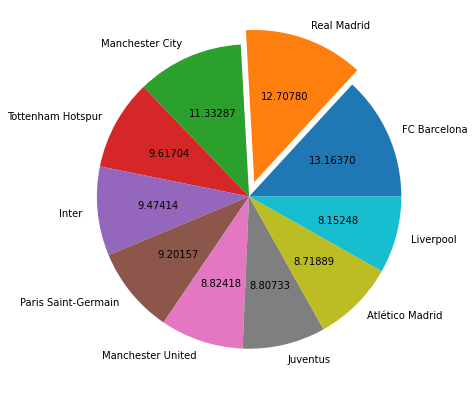

In [33]:
q1 = df.groupBy('Club').agg(sum('Value').alias('Total_Value')).orderBy('Total_Value',ascending=False).limit(10)
club_list = [row['Club'] for row in q1.collect()]
value_list = [row['Total_Value'] for row in q1.collect()]

## pie chart
plt.figure(figsize=(7,7))
plt.pie(value_list,labels=club_list,explode=[0,0.1,0,0,0,0,0,0,0,0],autopct='%0.5f')
plt.show()

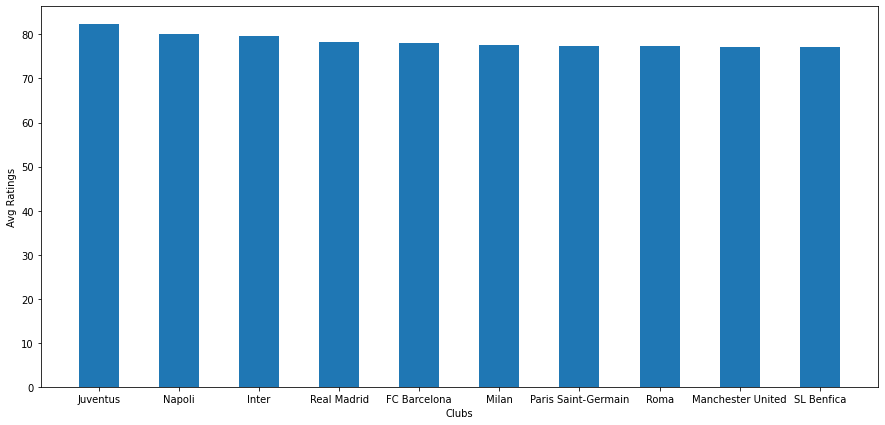

In [55]:
q2 = df.groupBy('Club').agg(avg('Overall').alias('Overall')).orderBy('Overall',ascending=False).limit(10)
club_list = [row['Club'] for row in q2.collect()]
overall_list = [row['Overall'] for row in q2.collect()]

## bar plot
plt.figure(figsize=(15,7))
plt.xlabel('Clubs')
plt.ylabel('Avg Ratings')
plt.bar(club_list,overall_list,width=0.5)
plt.show()

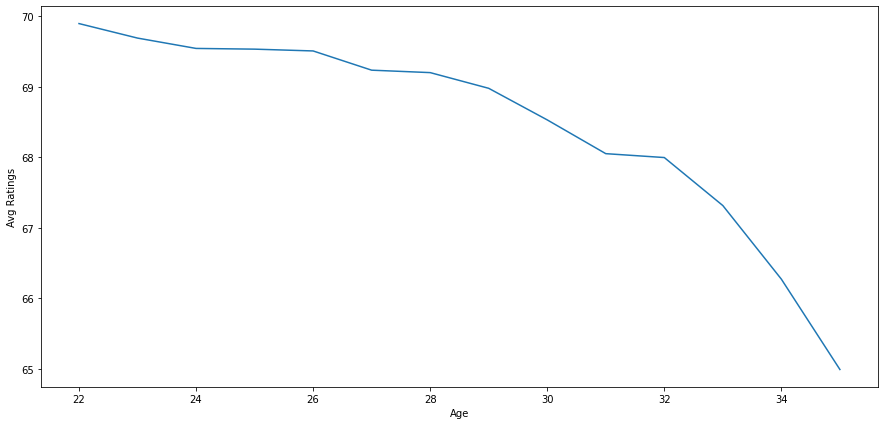

In [67]:
q3 = df.groupBy('Age').agg(avg('Overall').alias('Overall')).filter("age >= 22 and age<=35").orderBy('Overall',ascending=False)
age_list = sorted([row['Age'] for row in q3.collect()])
overall_list = [row['Overall'] for row in q3.collect()]


#lineplot
plt.figure(figsize=(15,7))
plt.xlabel('Age')
plt.ylabel('Avg Ratings')
plt.plot(age_list,overall_list)
plt.show()

## window functions

In [56]:
from pyspark.sql.window import Window

windowSpec = Window.partitionBy("Club").orderBy("Value")

df.withColumn("row_number",f.row_number().over(windowSpec)).show(100)

+------+----------------+---+-------------+-------+--------------------+---------+----------+----------+
|    ID|            Name|Age|  Nationality|Overall|                Club|    Value|    Joined|row_number|
+------+----------------+---+-------------+-------+--------------------+---------+----------+----------+
|240218|    A. Weidinger| 21|      Germany|     52| SSV Jahn Regensburg|    60000|2017-07-29|         1|
|228510|       H. Hyseni| 25|      Germany|     58| SSV Jahn Regensburg|   160000|2016-01-08|         2|
|176592|     M. Palionis| 31|    Lithuania|     64| SSV Jahn Regensburg|   300000|2014-10-09|         3|
|238669|         S. Kopp| 23|      Germany|     61| SSV Jahn Regensburg|   325000|2014-07-01|         4|
|165176|        S. Freis| 33|      Germany|     66| SSV Jahn Regensburg|   400000|2017-08-19|         5|
|208983|         O. Hein| 28|      Germany|     65| SSV Jahn Regensburg|   425000|2007-07-01|         6|
|238667|       A. Odabas| 24|      Germany|     63| SSV

In [174]:
windowSpec = Window.partitionBy("Club").orderBy("Overall")

df.withColumn("Rank",f.rank().over(windowSpec)).show()  # ranking with gaps

df.withColumn("Rank",f.dense_rank().over(windowSpec)).show()  # ranking without gaps


+------+---------------+---+-----------+-------+--------------------+---------+------------+----+
|    ID|           Name|Age|Nationality|Overall|                Club|    Value|      Joined|Rank|
+------+---------------+---+-----------+-------+--------------------+---------+------------+----+
|240218|   A. Weidinger| 21|    Germany|     52| SSV Jahn Regensburg|    60000|Jul 29, 2017|   1|
|228510|      H. Hyseni| 25|    Germany|     58| SSV Jahn Regensburg|   160000| Jan 8, 2016|   2|
|238669|        S. Kopp| 23|    Germany|     61| SSV Jahn Regensburg|   325000| Jul 1, 2014|   3|
|239494|  M. Thalhammer| 20|    Germany|     61| SSV Jahn Regensburg|   425000|        null|   3|
|238667|      A. Odabas| 24|    Germany|     63| SSV Jahn Regensburg|   425000| Jul 1, 2017|   5|
|240027|     A. Vrenezi| 24|     Kosovo|     63| SSV Jahn Regensburg|   500000| Jul 1, 2017|   5|
|239121|H. Al Ghaddioui| 27|    Morocco|     64| SSV Jahn Regensburg|   475000| Jan 4, 2018|   7|
|244280|        A. F

## aggregate functions

In [34]:
import pyspark.sql.functions as f

In [35]:
club_list_duplicates = df.select(f.collect_list("Club")).collect()[0][0]
club_list_distinct = df.select(f.collect_set("Club")).collect()[0][0]

In [70]:
print(dir(f))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

In [36]:
df.select(f.avg("Value")).collect()[0][0]   #max,min,mean,sum

134672529.1221328

In [37]:
df.select(f.first("Name")).show()           # first and last

+-----------+
|first(Name)|
+-----------+
|   L. Messi|
+-----------+



In [38]:
new_df = df.select('Name',f.expr("Name || '-' || Age").alias("Name-Age"))         #expr()

In [39]:
new_df.select('Name','Name-Age',f.lit("Footballer").alias("Profession")).show(2)             #lit()

+-----------------+--------------------+----------+
|             Name|            Name-Age|Profession|
+-----------------+--------------------+----------+
|         L. Messi|         L. Messi-31|Footballer|
|Cristiano Ronaldo|Cristiano Ronaldo-33|Footballer|
+-----------------+--------------------+----------+
only showing top 2 rows



In [30]:
data = [(1,"20200828"),(2,"20180725")]
columns=StructType([StructField("id",StringType()),StructField("date",StringType())])
dataF = spark.createDataFrame(data,columns)
dataF = dataF.withColumn('year', f.substring('date', 1,4)).withColumn('month', f.substring('date', 5,2)).withColumn('day', f.substring('date', 7,2))
dataF.printSchema()
dataF.show(truncate=False)

root
 |-- id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)

+---+--------+----+-----+---+
|id |date    |year|month|day|
+---+--------+----+-----+---+
|1  |20200828|2020|08   |28 |
|2  |20180725|2018|07   |25 |
+---+--------+----+-----+---+



In [31]:
dataF = dataF.withColumn("date",f.to_date(dataF.date,"yyyyMMdd"))
dataF.show()
dataF.printSchema()
dataF.select("date",f.date_format(dataF.date,"MMM dd, yyyy")).show()

+---+----------+----+-----+---+
| id|      date|year|month|day|
+---+----------+----+-----+---+
|  1|2020-08-28|2020|   08| 28|
|  2|2018-07-25|2018|   07| 25|
+---+----------+----+-----+---+

root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)

+----------+-------------------------------+
|      date|date_format(date, MMM dd, yyyy)|
+----------+-------------------------------+
|2020-08-28|                   Aug 28, 2020|
|2018-07-25|                   Jul 25, 2018|
+----------+-------------------------------+



In [31]:
# DATES 
data = [["1","2020-02-01"],["2","2019-03-01"],["3","2021-03-01"]]
dfD = spark.createDataFrame(data,["id","input"])

dfD.select("input",f.date_format("input","MM dd, yyyy").alias("Date format")).show()

#months_between()
dfD.select("input",f.months_between(f.current_date(),"input").alias("months_between")).show()

+----------+-----------+
|     input|Date format|
+----------+-----------+
|2020-02-01|02 01, 2020|
|2019-03-01|03 01, 2019|
|2021-03-01|03 01, 2021|
+----------+-----------+

+----------+--------------+
|     input|months_between|
+----------+--------------+
|2020-02-01|   25.90322581|
|2019-03-01|   36.90322581|
|2021-03-01|   12.90322581|
+----------+--------------+



In [42]:
df.withColumn("Joined",f.to_date("Joined", "mm-dd-yyyy")).show()

+------+-----------------+---+-----------+-------+-------------------+-----------+----------+
|    ID|             Name|Age|Nationality|Overall|               Club|      Value|    Joined|
+------+-----------------+---+-----------+-------+-------------------+-----------+----------+
|158023|         L. Messi| 31|  Argentina|     94|       FC Barcelona|11050000000|2004-07-01|
| 20801|Cristiano Ronaldo| 33|   Portugal|     94|           Juventus|  770000000|2018-07-10|
|190871|        Neymar Jr| 26|     Brazil|     92|Paris Saint-Germain|11850000000|2017-08-03|
|193080|           De Gea| 27|      Spain|     91|  Manchester United|  720000000|2011-07-01|
|192985|     K. De Bruyne| 27|    Belgium|     91|    Manchester City| 1020000000|2015-08-30|
|183277|        E. Hazard| 27|    Belgium|     91|            Chelsea|  930000000|2012-07-01|
|177003|        L. Modrić| 32|    Croatia|     91|        Real Madrid|  670000000|2012-08-01|
|176580|        L. Suárez| 31|    Uruguay|     91|       FC 

In [79]:
# TRANSLATE FUNCTION
address = [(1,"14851 Jeffrey Rd","DE"),
    (2,"43421 Margarita St","NY"),
    (3,"13111 Siemon Ave","CA")]
df = spark.createDataFrame(address,["id","address","state"])

df.withColumn('address', f.translate('address', '123J', 'ABCl')).show(truncate=False)

+---+------------------+-----+
|id |address           |state|
+---+------------------+-----+
|1  |A485A leffrey Rd  |DE   |
|2  |4C4BA Margarita St|NY   |
|3  |ACAAA Siemon Ave  |CA   |
+---+------------------+-----+



In [118]:
# OVERLAY FUNCTION
dfSample = spark.createDataFrame([("ABCDE_XYZ", "FGH")], ("col1", "col2"))
dfSample.select("col1","col2",f.overlay("col1", "col2", 7).alias("overlayed")).show()

+---------+----+---------+
|     col1|col2|overlayed|
+---------+----+---------+
|ABCDE_XYZ| FGH|ABCDE_FGH|
+---------+----+---------+



In [123]:
# ARRAY FUNCTION

df.select('id',f.array(df.address,df.state).alias("Address_State")).show()

+---+--------------------+
| id|       Address_State|
+---+--------------------+
|  1|[14851 Jeffrey Rd...|
|  2|[43421 Margarita ...|
|  3|[13111 Siemon Ave...|
+---+--------------------+



In [136]:
summary = df.describe()  #rounding
summary.show(truncate=True)
summary.select("summary",f.format_number(df["Overall"].cast('float'),3).alias("Rounded column")).show()

+-------+------------------+-------------+-----------------+-----------+-----------------+--------------------+--------------------+-----------+
|summary|                ID|         Name|              Age|Nationality|          Overall|                Club|               Value|     Joined|
+-------+------------------+-------------+-----------------+-----------+-----------------+--------------------+--------------------+-----------+
|  count|             17966|        17966|            17966|      17966|            17966|               17966|               17966|      16654|
|   mean|214244.85723032395|         null|25.10497606590226|       null|66.22548146498943|                null|1.3572894578648558E8|       null|
| stddev|30039.126766659916|         null|4.674724423457982|       null|6.923435495765825|                null| 4.019082455945618E8|       null|
|    min|                16|     A. Abang|               16|Afghanistan|               46| SSV Jahn Regensburg|                   

AnalysisException: Resolved attribute(s) Overall#6616 missing from summary#16426,ID#16427,Name#16428,Age#16429,Nationality#16430,Overall#16431,Club#16432,Value#16433,Joined#16434 in operator !Project [summary#16426, format_number(cast(Overall#6616 as float), 3) AS Rounded column#16481]. Attribute(s) with the same name appear in the operation: Overall. Please check if the right attribute(s) are used.;
!Project [summary#16426, format_number(cast(Overall#6616 as float), 3) AS Rounded column#16481]
+- LocalRelation [summary#16426, ID#16427, Name#16428, Age#16429, Nationality#16430, Overall#16431, Club#16432, Value#16433, Joined#16434]


## sampling

In [137]:
df.sample(0.1).show(10)

+------+--------------+---+-----------+-------+-----------------+----------+------------+
|    ID|          Name|Age|Nationality|Overall|             Club|     Value|      Joined|
+------+--------------+---+-----------+-------+-----------------+----------+------------+
|188545|R. Lewandowski| 29|     Poland|     90|FC Bayern München| 770000000| Jul 1, 2014|
|168651|    I. Rakitić| 30|    Croatia|     87|     FC Barcelona|4650000000| Jul 1, 2014|
|190483| Douglas Costa| 27|     Brazil|     86|         Juventus|4650000000| Jul 1, 2018|
|193747|          Koke| 26|      Spain|     85|  Atlético Madrid| 450000000| Jan 1, 2011|
|184941|    A. Sánchez| 29|      Chile|     85|Manchester United|3750000000|Jan 22, 2018|
|181458|    I. Perišić| 29|    Croatia|     85|            Inter|3750000000| Sep 1, 2015|
|178518| R. Nainggolan| 30|    Belgium|     85|            Inter|3550000000| Jul 1, 2018|
|165153|    K. Benzema| 30|     France|     85|      Real Madrid| 370000000| Jul 9, 2009|
|178750| S

In [89]:
df.sampleBy("Age",{25:0.2,26:0.3,27:0.5}).show()

+------+----------------+---+-----------+-------+-------------------+----------+------------+
|    ID|            Name|Age|Nationality|Overall|               Club|     Value|      Joined|
+------+----------------+---+-----------+-------+-------------------+----------+------------+
|193080|          De Gea| 27|      Spain|     91|  Manchester United| 720000000| Jul 1, 2011|
|183277|       E. Hazard| 27|    Belgium|     91|            Chelsea| 930000000| Jul 1, 2012|
|194765|    A. Griezmann| 27|     France|     89|    Atlético Madrid| 780000000|Jul 28, 2014|
|192448|   M. ter Stegen| 26|    Germany|     89|       FC Barcelona| 580000000| Jul 1, 2014|
|198219|      L. Insigne| 27|      Italy|     88|             Napoli| 620000000| Jul 1, 2010|
|197781|            Isco| 26|      Spain|     88|        Real Madrid|7350000000| Jul 3, 2013|
|199556|     M. Verratti| 25|      Italy|     86|Paris Saint-Germain| 550000000|Jul 18, 2012|
|189509|          Thiago| 27|      Spain|     86|  FC Bayern

## Saving Dataframe

In [65]:
df.write.parquet('./just_parquet',mode='overwrite',partitionBy="Club")

In [66]:
df.write.parquet('./just_parquet_wopart',mode='overwrite')

In [74]:
df.repartition(1)
df.write.csv('./just_csv',mode='overwrite',sep=',',header=True)

22/04/11 17:08:30 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 4400128 ms exceeds timeout 120000 ms
22/04/11 17:08:30 WARN SparkContext: Killing executors is not supported by current scheduler.


In [94]:
df = df.repartition(1)
df.select('Name').write.mode('overwrite').text('./just_text')

In [95]:
df.write.format('parquet').mode('overwrite').partitionBy('Club')

## temporary views

In [68]:
df.createOrReplaceTempView('stats')

In [69]:
spark.sql('select * from stats limit 10').show()

+------+-----------------+---+-----------+-------+-------------------+-----------+----------+
|    ID|             Name|Age|Nationality|Overall|               Club|      Value|    Joined|
+------+-----------------+---+-----------+-------+-------------------+-----------+----------+
|158023|         L. Messi| 31|  Argentina|     94|       FC Barcelona|11050000000|2004-07-01|
| 20801|Cristiano Ronaldo| 33|   Portugal|     94|           Juventus|  770000000|2018-07-10|
|190871|        Neymar Jr| 26|     Brazil|     92|Paris Saint-Germain|11850000000|2017-08-03|
|193080|           De Gea| 27|      Spain|     91|  Manchester United|  720000000|2011-07-01|
|192985|     K. De Bruyne| 27|    Belgium|     91|    Manchester City| 1020000000|2015-08-30|
|183277|        E. Hazard| 27|    Belgium|     91|            Chelsea|  930000000|2012-07-01|
|177003|        L. Modrić| 32|    Croatia|     91|        Real Madrid|  670000000|2012-08-01|
|176580|        L. Suárez| 31|    Uruguay|     91|       FC 

In [70]:
spark.sql('select count(*) from parquet.`./just_parquet/`').show(10)
spark.sql('select * from csv.`./just_text` limit 10').show(10)

+--------+
|count(1)|
+--------+
|   16654|
+--------+

+-----------------+
|              _c0|
+-----------------+
|         L. Messi|
|Cristiano Ronaldo|
|        Neymar Jr|
|           De Gea|
|     K. De Bruyne|
|        E. Hazard|
|        L. Modrić|
|        L. Suárez|
|     Sergio Ramos|
|         J. Oblak|
+-----------------+



In [71]:
df.createOrReplaceTempView('new_view')
reloaded_table = spark.table('new_view')  # reload temporary view as dataframe
reloaded_table.show(2)
reloaded_table.sort('Age',ascending=False).show(10)
print(type(reloaded_table))

+------+-----------------+---+-----------+-------+------------+-----------+----------+
|    ID|             Name|Age|Nationality|Overall|        Club|      Value|    Joined|
+------+-----------------+---+-----------+-------+------------+-----------+----------+
|158023|         L. Messi| 31|  Argentina|     94|FC Barcelona|11050000000|2004-07-01|
| 20801|Cristiano Ronaldo| 33|   Portugal|     94|    Juventus|  770000000|2018-07-10|
+------+-----------------+---+-----------+-------+------------+-----------+----------+
only showing top 2 rows

+------+-------------+---+-----------------+-------+--------------------+------+----------+
|    ID|         Name|Age|      Nationality|Overall|                Club| Value|    Joined|
+------+-------------+---+-----------------+-------+--------------------+------+----------+
|140029|     O. Pérez| 45|           Mexico|     71|             Pachuca|160000|1991-06-01|
| 53748|K. Pilkington| 44|          England|     48|    Cambridge United|     0|2018-

In [43]:
spark.catalog.listTables('default')
#spark.sql("create database db1")
spark.sql("show databases;").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [56]:
spark.sql('drop table modified_table')

AnalysisException: Table or view not found: modified_table; line 1 pos 11;
'DropTable false, false
+- 'UnresolvedTableOrView [modified_table], DROP TABLE, true


In [57]:
#persistent table

df.write.option('path','./tablesP').saveAsTable('modified_table')  # doesn't work

AnalysisException: CREATE-TABLE-AS-SELECT cannot create table with location to a non-empty directory tablesP . To allow overwriting the existing non-empty directory, set 'spark.sql.legacy.allowNonEmptyLocationInCTAS' to true.

In [58]:
spark.sql('select * from parquet.`./tables`').show(5)

+------+-----------+---+-----------+-------+-------------------+---------+--------------+
|    ID|       Name|Age|Nationality|Overall|               Club|    Value|Preferred_foot|
+------+-----------+---+-----------+-------+-------------------+---------+--------------+
|192255|P. Maiorino| 29|      Italy|     62|            Livorno|   300000|         Right|
|210556| Lucas João| 24|   Portugal|     69|Sheffield Wednesday|140000000|         Right|
|208158| F. Andrada| 24|  Argentina|     69|  Unión de Santa Fe|150000000|         Right|
|238468|    C. Mesa| 20|   Colombia|     50|    América de Cali|    60000|         Right|
|234178|   L. Abram| 22|       Peru|     70|    Vélez Sarsfield|240000000|          Left|
+------+-----------+---+-----------+-------+-------------------+---------+--------------+
only showing top 5 rows



In [115]:
spark.sql('select * from modified_table limit 10').show(5)

+---+----+---+-----------+-------+----+-----+------+
| ID|Name|Age|Nationality|Overall|Club|Value|Joined|
+---+----+---+-----------+-------+----+-----+------+
+---+----+---+-----------+-------+----+-----+------+



## Tables

In [72]:
# temporary tables -- temporary tables does not belongs to any database
df.registerTempTable('tempTable1')
spark.sql("show databases").show()
spark.sql("create database db1;")

+---------+
|namespace|
+---------+
|  default|
+---------+



/home/shashank/env/lib/python3.8/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


DataFrame[]

In [73]:
df.write.saveAsTable('db1.permTable2')
spark.sql("show tables in db1").show()

AnalysisException: Can not create the managed table('`db1`.`permTable2`'). The associated location('file:/home/shashank/Practice/spark-warehouse/db1.db/permtable2') already exists.

In [62]:
spark.sql("show databases;").show()

+---------+
|namespace|
+---------+
|      db1|
|  default|
+---------+



In [65]:
spark.sql("select * from db1.permTable2").show()

+------+-----------------+---+-----------+-------+-------------------+-----------+------------+
|    ID|             Name|Age|Nationality|Overall|               Club|      Value|      Joined|
+------+-----------------+---+-----------+-------+-------------------+-----------+------------+
|158023|         L. Messi| 31|  Argentina|     94|       FC Barcelona|11050000000| Jul 1, 2004|
| 20801|Cristiano Ronaldo| 33|   Portugal|     94|           Juventus|  770000000|Jul 10, 2018|
|190871|        Neymar Jr| 26|     Brazil|     92|Paris Saint-Germain|11850000000| Aug 3, 2017|
|193080|           De Gea| 27|      Spain|     91|  Manchester United|  720000000| Jul 1, 2011|
|192985|     K. De Bruyne| 27|    Belgium|     91|    Manchester City| 1020000000|Aug 30, 2015|
|183277|        E. Hazard| 27|    Belgium|     91|            Chelsea|  930000000| Jul 1, 2012|
|177003|        L. Modrić| 32|    Croatia|     91|        Real Madrid|  670000000| Aug 1, 2012|
|176580|        L. Suárez| 31|    Urugua

# JOINS

In [127]:
emp = [(1,"Smith",-1,"2018","10","M",3000),
    (2,"Rose",1,"2010","20","M",4000),
    (3,"Williams",1,"2010","10","M",1000),
    (4,"Jones",2,"2005","10","F",2000),
    (5,"Brown",2,"2010","40","",-1),
      (6,"Brown",2,"2010","50","",-1)
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined",
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)

dept = [("Finance",10),
    ("Marketing",20),
    ("Sales",30),
    ("IT",40)]

deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)

root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

In [120]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner").select('emp_id','name','dept_name').show()

+------+--------+---------+
|emp_id|    name|dept_name|
+------+--------+---------+
|     1|   Smith|  Finance|
|     3|Williams|  Finance|
|     4|   Jones|  Finance|
|     2|    Rose|Marketing|
|     5|   Brown|       IT|
+------+--------+---------+



In [ ]:
#joins "inner","left","right","full"

In [122]:
empDF.createOrReplaceTempView("EMP")
deptDF.createOrReplaceTempView("DEPT")

In [124]:
joinDF2 = spark.sql("select * from EMP e INNER JOIN DEPT d ON e.emp_dept_id == d.dept_id").show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



## Union

In [127]:
simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000), 
    ("Robert","Sales","CA",81000,30,23000), 
    ("Maria","Finance","CA",90000,24,23000) 
  ]

columns= ["employee_name","department","state","salary","age","bonus"]

simpleData2 = [("James","Sales","NY",90000,34,10000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

df1 = spark.createDataFrame(simpleData,schema=columns)
df2 = spark.createDataFrame(simpleData2,schema=columns)

union_df = df1.union(df2).show()

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|        James|     Sales|   NY| 90000| 34|10000|
|      Michael|     Sales|   NY| 86000| 56|20000|
|       Robert|     Sales|   CA| 81000| 30|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|        James|     Sales|   NY| 90000| 34|10000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|          Jen|   Finance|   NY| 79000| 53|15000|
|         Jeff| Marketing|   CA| 80000| 25|18000|
|        Kumar| Marketing|   NY| 91000| 50|21000|
+-------------+----------+-----+------+---+-----+



In [128]:
#unionByNames --> used to merge columns by names instead of positions

In [137]:
data = ["Project Gutenberg’s",
        "Alice’s Adventures in Wonderland",
        "Project Gutenberg’s",
        "Adventures in Wonderland",
        "Project Gutenberg’s"]

rdd=spark.sparkContext.parallelize(data)
rdd2=rdd.flatMap(lambda x: x.split(" "))

for element in rdd2.collect():
    print(element)
    


Project
Gutenberg’s
Alice’s
Adventures
in
Wonderland
Project
Gutenberg’s
Adventures
in
Wonderland
Project
Gutenberg’s


## datetime

In [128]:
df.show(2)

+------+-----------------+---+-----------+-------+------------+-----------+------------+
|    ID|             Name|Age|Nationality|Overall|        Club|      Value|      Joined|
+------+-----------------+---+-----------+-------+------------+-----------+------------+
|158023|         L. Messi| 31|  Argentina|     94|FC Barcelona|11050000000| Jul 1, 2004|
| 20801|Cristiano Ronaldo| 33|   Portugal|     94|    Juventus|  770000000|Jul 10, 2018|
+------+-----------------+---+-----------+-------+------------+-----------+------------+
only showing top 2 rows



In [129]:
df.select(f.current_date()).show(1)    #current date

+--------------+
|current_date()|
+--------------+
|    2022-04-01|
+--------------+
only showing top 1 row



In [131]:
df.select(f.to_date("Joined","mm dd, yyyy")).show()

+----------------------------+
|to_date(Joined, mm dd, yyyy)|
+----------------------------+
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
|                        null|
+----------------------------+
only showing top 20 rows



In [132]:
data = [["1","2020-02-01"],["2","2019-03-01"],["3","2021-03-01"]]
df = spark.createDataFrame(data,["id","input"])
df.show(5)

+---+----------+
| id|     input|
+---+----------+
|  1|2020-02-01|
|  2|2019-03-01|
|  3|2021-03-01|
+---+----------+



In [133]:
df = df.withColumn("input",df.input.cast(DateType()))
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- input: date (nullable = true)



In [134]:
df.select(f.current_timestamp()).show()

+--------------------+
| current_timestamp()|
+--------------------+
|2022-04-01 11:23:...|
|2022-04-01 11:23:...|
|2022-04-01 11:23:...|
+--------------------+



In [137]:
df.select("input",f.date_format("input", "MM-dd-yyyy").alias("date_format")).show() #changing format

+----------+-----------+
|     input|date_format|
+----------+-----------+
|2020-02-01| 02-01-2020|
|2019-03-01| 03-01-2019|
|2021-03-01| 03-01-2021|
+----------+-----------+



In [139]:
df.select(f.datediff(f.current_date(),"input")).show()   #difference in date #month_between()

+-------------------------------+
|datediff(current_date(), input)|
+-------------------------------+
|                            790|
|                           1127|
|                            396|
+-------------------------------+



In [141]:
df.select("input", 
    f.add_months("input",3).alias("add_months"), 
    f.add_months("input",-3).alias("sub_months"), 
    f.date_add("input",4).alias("date_add"), 
    f.date_sub("input",4).alias("date_sub")).show()

+----------+----------+----------+----------+----------+
|     input|add_months|sub_months|  date_add|  date_sub|
+----------+----------+----------+----------+----------+
|2020-02-01|2020-05-01|2019-11-01|2020-02-05|2020-01-28|
|2019-03-01|2019-06-01|2018-12-01|2019-03-05|2019-02-25|
|2021-03-01|2021-06-01|2020-12-01|2021-03-05|2021-02-25|
+----------+----------+----------+----------+----------+



In [136]:
df.select(col("input"), 
     f.year(col("input")).alias("year"), 
     f.month(col("input")).alias("month"), 
     f.next_day(col("input"),"Sunday").alias("next_day"), 
     f.weekofyear(col("input")).alias("weekofyear")).show()

+----------+----+-----+----------+----------+
|     input|year|month|  next_day|weekofyear|
+----------+----+-----+----------+----------+
|2020-02-01|2020|    2|2020-02-02|         5|
|2019-03-01|2019|    3|2019-03-03|         9|
|2021-03-01|2021|    3|2021-03-07|         9|
+----------+----+-----+----------+----------+



## User defined functions

In [59]:
dfU = df.select("*").limit(10)

In [60]:
def convCase(s):
    result = ""
    for x in s.split(" "):
        result+=x[0].lower() + x[1:] + " "
    return result.strip()

p = convCase("Shashank Ajgaonkar")

In [61]:
""" Converting function to UDF """
convertUDF = f.udf(lambda z: convCase(z),StringType())

In [62]:
dfU.select("ID",convertUDF("Name").alias("Inverted name")).show()

+------+-----------------+
|    ID|    Inverted name|
+------+-----------------+
|158023|         l. messi|
| 20801|cristiano ronaldo|
|190871|        neymar jr|
|193080|           de gea|
|192985|     k. de bruyne|
|183277|        e. hazard|
|177003|        l. modrić|
|176580|        l. suárez|
|155862|     sergio ramos|
|200389|         j. oblak|
+------+-----------------+



In [159]:
""" Using UDF on SQL """
spark.udf.register("convertUDF", convCase, StringType())
dfU.createOrReplaceTempView("new_view")
spark.sql("select ID, convertUDF(Name) as name from new_view").show(truncate=False)


+------+-----------------+
|ID    |name             |
+------+-----------------+
|158023|l. messi         |
|20801 |cristiano ronaldo|
|190871|neymar jr        |
|193080|de gea           |
|192985|k. de bruyne     |
|183277|e. hazard        |
|177003|l. modrić        |
|176580|l. suárez        |
|155862|sergio ramos     |
|200389|j. oblak         |
+------+-----------------+



## pivot

In [44]:
## used to transform rows to columns
data = [("Banana",1000,"USA"), ("Carrots",1500,"USA"), ("Beans",1600,"USA"),
      ("Orange",2000,"USA"),("Orange",2000,"USA"),("Banana",400,"China"),
      ("Carrots",1200,"China"),("Beans",1500,"China"),("Orange",4000,"China"),
      ("Banana",2000,"Canada"),("Carrots",2000,"Canada"),("Beans",2000,"Mexico")]

columns = ["Product","Amount","Country"]
dfP = spark.createDataFrame(data = data, schema = columns)
dfP.show()

+-------+------+-------+
|Product|Amount|Country|
+-------+------+-------+
| Banana|  1000|    USA|
|Carrots|  1500|    USA|
|  Beans|  1600|    USA|
| Orange|  2000|    USA|
| Orange|  2000|    USA|
| Banana|   400|  China|
|Carrots|  1200|  China|
|  Beans|  1500|  China|
| Orange|  4000|  China|
| Banana|  2000| Canada|
|Carrots|  2000| Canada|
|  Beans|  2000| Mexico|
+-------+------+-------+



In [46]:
pivotDF = dfP.groupBy("Country").pivot("Product").sum("Amount")
pivotDF.show()

+-------+------+-----+-------+------+
|Country|Banana|Beans|Carrots|Orange|
+-------+------+-----+-------+------+
|  China|   400| 1500|   1200|  4000|
|    USA|  1000| 1600|   1500|  4000|
| Mexico|  null| 2000|   null|  null|
| Canada|  2000| null|   2000|  null|
+-------+------+-----+-------+------+



In [165]:
df.groupBy("Product","Country").sum("Amount").orderBy("Product").show()

+-------+-------+-----------+
|Product|Country|sum(Amount)|
+-------+-------+-----------+
| Banana| Canada|       2000|
| Banana|  China|        400|
| Banana|    USA|       1000|
|  Beans|    USA|       1600|
|  Beans| Mexico|       2000|
|  Beans|  China|       1500|
|Carrots| Canada|       2000|
|Carrots|    USA|       1500|
|Carrots|  China|       1200|
| Orange|    USA|       4000|
| Orange|  China|       4000|
+-------+-------+-----------+



## snowflake connection

In [47]:
import snowflake.connector as conn

In [48]:
snowflake_conn = conn.connect(account="jv04488.southeast-asia.azure",user="snow",\
                             password="#definePASS2",warehouse="COMPUTE_WH",role="ACCOUNTADMIN")

In [50]:
cur = snowflake_conn.cursor()

In [51]:
cur.execute("use database citibike;")

In [52]:
cur.execute("select * from citibike.public.players_tbstage limit 10;")

In [53]:
print(cur.fetchall())

[(243718, 'R. Koot', 18, 'Netherlands', 56, 'Fortuna Sittard', '120000', 'Jul 1, 2016'), (237575, 'J. Pourtau', 18, 'Argentina', 56, 'Estudiantes de La Plata', '150000', 'Jan 1, 2017'), (238343, 'D. Mushitu', 18, 'Sweden', 56, 'AIK', '190000', 'Jul 1, 2016'), (237321, 'M. Berisha', 20, 'Kosovo', 56, '1. FC Magdeburg', '200000', None), (237833, 'M. Harris', 19, 'Wales', 56, 'Newport County', '200000', None), (241418, 'Gao Tianyi', 20, 'China PR', 56, 'Jiangsu Suning FC', '130000', 'Feb 13, 2017'), (231179, 'J. Al Dossary', 24, 'Saudi Arabia', 56, 'Al Faisaly', '100000', 'Jul 8, 2017'), (246283, 'L. Seydoux', 20, 'Switzerland', 56, 'BSC Young Boys', '140000', 'Sep 26, 2018'), (239629, 'A. Medina', 20, 'Mexico', 56, 'Deportivo Toluca', '200000', 'Jul 11, 2014'), (231182, "O. O'Dwyer", 20, 'England', 56, 'Crystal Palace', '160000', 'Jul 1, 2015')]


22/04/18 18:10:04 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 676050 ms exceeds timeout 120000 ms
22/04/18 18:10:06 WARN SparkContext: Killing executors is not supported by current scheduler.


In [20]:
# query data using queryID
queryId = cur.sfqid
cur.get_results_from_sfqid(queryId)  
print(cur.fetchall())

[(243718, 'R. Koot', 18, 'Netherlands', 56, 'Fortuna Sittard', '120000', 'Jul 1, 2016'), (237575, 'J. Pourtau', 18, 'Argentina', 56, 'Estudiantes de La Plata', '150000', 'Jan 1, 2017'), (238343, 'D. Mushitu', 18, 'Sweden', 56, 'AIK', '190000', 'Jul 1, 2016'), (237321, 'M. Berisha', 20, 'Kosovo', 56, '1. FC Magdeburg', '200000', None), (237833, 'M. Harris', 19, 'Wales', 56, 'Newport County', '200000', None), (241418, 'Gao Tianyi', 20, 'China PR', 56, 'Jiangsu Suning FC', '130000', 'Feb 13, 2017'), (231179, 'J. Al Dossary', 24, 'Saudi Arabia', 56, 'Al Faisaly', '100000', 'Jul 8, 2017'), (246283, 'L. Seydoux', 20, 'Switzerland', 56, 'BSC Young Boys', '140000', 'Sep 26, 2018'), (239629, 'A. Medina', 20, 'Mexico', 56, 'Deportivo Toluca', '200000', 'Jul 11, 2014'), (231182, "O. O'Dwyer", 20, 'England', 56, 'Crystal Palace', '160000', 'Jul 1, 2015')]


In [22]:
print(cur.fetchall())

[]


In [224]:
spark2 = SparkSession.builder.master("local[4]").config("spark.jars","file:///home/shashank/Downloads/snowflake-jdbc-3.13.16.jar").getOrCreate()

In [262]:
## writing data to snowflake table

    sfOptions = {
     "sfURL" : "https://ty57285.southeast-asia.azure.snowflakecomputing.com",
     "sfAccount" : "ty57285",
     "sfUser" : "shashank",
     "sfPassword" : "#definePASS2",
     "sfDatabase" : "CITIBIKE",
     "sfSchema" : "public",
     "sfWarehouse" : "compute_wh",
     "sfRole" : "ACCOUNTADMIN",
    }

SNOWFLAKE_SOURCE_NAME = "net.snowflake.spark.snowflake"

In [263]:
df.write.format(SNOWFLAKE_SOURCE_NAME).options(**sfOptions).option("dbtable", "players").mode("append").options(header=True).save()

Py4JJavaError: An error occurred while calling o1861.save.
: java.lang.ClassNotFoundException: 
Failed to find data source: net.snowflake.spark.snowflake. Please find packages at
http://spark.apache.org/third-party-projects.html
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedToFindDataSourceError(QueryExecutionErrors.scala:443)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:670)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSourceV2(DataSource.scala:720)
	at org.apache.spark.sql.DataFrameWriter.lookupV2Provider(DataFrameWriter.scala:852)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:256)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:247)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.ClassNotFoundException: net.snowflake.spark.snowflake.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:476)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:589)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:522)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:656)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:656)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:656)
	... 16 more


In [264]:
sdf = spark.read.format(SNOWFLAKE_SOURCE_NAME).options(**sfOptions).option("dbtable", "players").load()

Py4JJavaError: An error occurred while calling o1874.load.
: java.lang.ClassNotFoundException: 
Failed to find data source: net.snowflake.spark.snowflake. Please find packages at
http://spark.apache.org/third-party-projects.html
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedToFindDataSourceError(QueryExecutionErrors.scala:443)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:670)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSourceV2(DataSource.scala:720)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:210)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:174)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.ClassNotFoundException: net.snowflake.spark.snowflake.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:476)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:589)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:522)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:656)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:656)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:656)
	... 15 more


In [ ]:
# put file:///home/shashank/Practice/spark-warehouse/db2.db/customer_history.csv @stg_pipe/history auto_compress=False


# openssl genrsa 2048 | openssl pkcs8 -topk8 -inform PEM -outrsa_key.p8 cat rsa_key.p8

# openssl rsa -in rsa_key.p8 -pubout -out rsa_key.pub

In [51]:
delta = spark.read.csv('spark-warehouse/db2.db/custtable1/customer_history.csv',header=True)
delta.show()

+-----+------------------+--------------------+---+---------------+-------+----------+---------------------------------------------------------------------------------------+
|60001|Customer#000060001|          9Ii4zQn9cX| 14|24-678-784-9652|9957.56| HOUSEHOLD|l theodolites boost slyly at the platelets: permanently ironic packages wake slyly pend|
+-----+------------------+--------------------+---+---------------+-------+----------+---------------------------------------------------------------------------------------+
|60002|Customer#000060002|    ThGBMjDwKzkoOxhz| 15|25-782-500-8435| 742.46|  BUILDING|                                                                   beans. fluffily r...|
|60003|Customer#000060003|Ed hbPtTXMTAsgGhC...| 16|26-859-847-7640|2526.92|  BUILDING|                                                                   fully pending dep...|
|60004|Customer#000060004|NivCT2RVaavl,yUnK...| 10|20-573-674-7999|7975.22|AUTOMOBILE|                                       

In [44]:
delta.printSchema()

root
 |-- 195001: integer (nullable = true)
 |-- Customer#000195001: string (nullable = true)
 |-- BDD2D1yWXby6uQIay: string (nullable = true)
 |-- 20: integer (nullable = true)
 |-- 30-683-252-5979: string (nullable = true)
 |-- 7254.02: double (nullable = true)
 |-- MACHINERY: string (nullable = true)
 |-- the quickly slow packages are fur: string (nullable = true)

